# Visualization

In [59]:
import os
import matplotlib.pyplot as plt
import pandas as pd

In [60]:
metrics_parent_path = (
    "/Users/ketai/Library/CloudStorage/OneDrive-USI/Thesis/experiments/normal"
)

In [70]:
def create_df_original_stats(metrics_parent_path) -> pd.DataFrame:
    df_list = []
    for i in range(1, 15):
        folder = f"day-{i}"
        agg_stats_path = os.path.join(
            metrics_parent_path, folder, "locust_aggregated_stats.csv"
        )
        df_stats = pd.read_csv(agg_stats_path)
        df_list.append(df_stats)
    return pd.concat(df_list)

def plot_response_time_before_and_after_cleaning(df_original_stats: pd.DataFrame, df_cleaned_stats: pd.DataFrame):
    original_response_time = df_original_stats["lm-95%"].to_list()
    cleaned_response_time = df_cleaned_stats["lm-95%"].to_list()
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    axs[0].plot(original_response_time)
    axs[1].plot(cleaned_response_time)
    axs[0].set_title("Before cleaning")
    axs[1].set_title("After cleaning")
    for ax in axs.flat:
        ax.set_ylabel("Response time (ms)")
        ax.set_xlabel("Minutes")
    plt.savefig(
        os.path.join("visualizations", "compare-response-time.pdf"), bbox_inches="tight"
    )

def plot_http_failure_rate_before_and_after_cleaning(df_original_stats: pd.DataFrame, df_cleaned_stats: pd.DataFrame):
    original_http_failure_rate = df_original_stats["lm-Failures/s"].to_list()
    cleaned_http_failure_rate = df_cleaned_stats["lm-Failures/s"].to_list()
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    axs[0].plot(original_http_failure_rate)
    axs[1].plot(cleaned_http_failure_rate)
    axs[0].set_title("Before cleaning")
    axs[1].set_title("After cleaning")
    for ax in axs.flat:
        ax.set_ylabel("Number of HTTP failures per second")
        ax.set_xlabel("Minutes")
    plt.savefig(
        os.path.join("visualizations", "compare-http-failure-rate.pdf"), bbox_inches="tight"
    )

In [62]:
df_original_stats = create_df_original_stats(metrics_parent_path)
df_cleaned_stats = pd.read_csv(
    os.path.join(metrics_parent_path, "locust_normal_stats.csv")
)

In [72]:
print(
    df_original_stats["lm-95%"].quantile(0.9995),
    df_original_stats["lm-95%"].quantile(0.999),
    df_cleaned_stats["lm-Failures/s"].max(),
)

60000.0 20000.0 0.0508474576271186


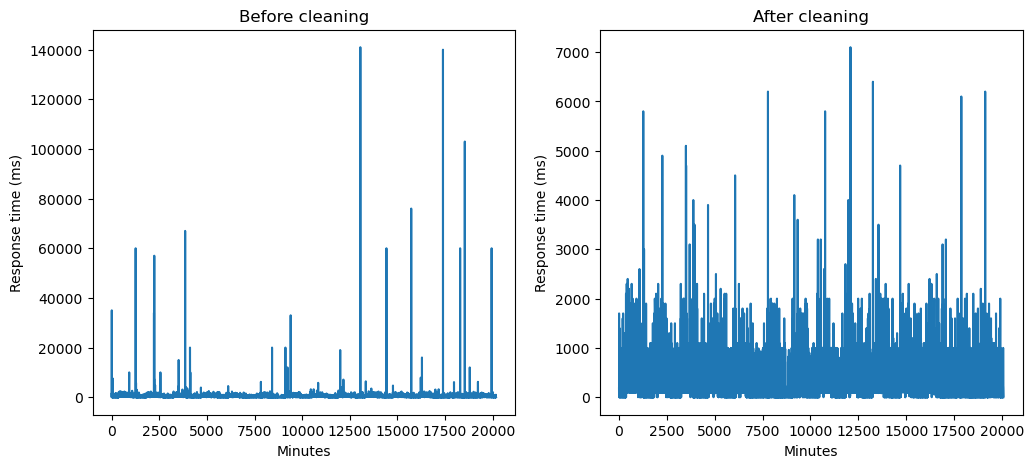

In [64]:
plot_response_time_before_and_after_cleaning(df_original_stats, df_cleaned_stats)

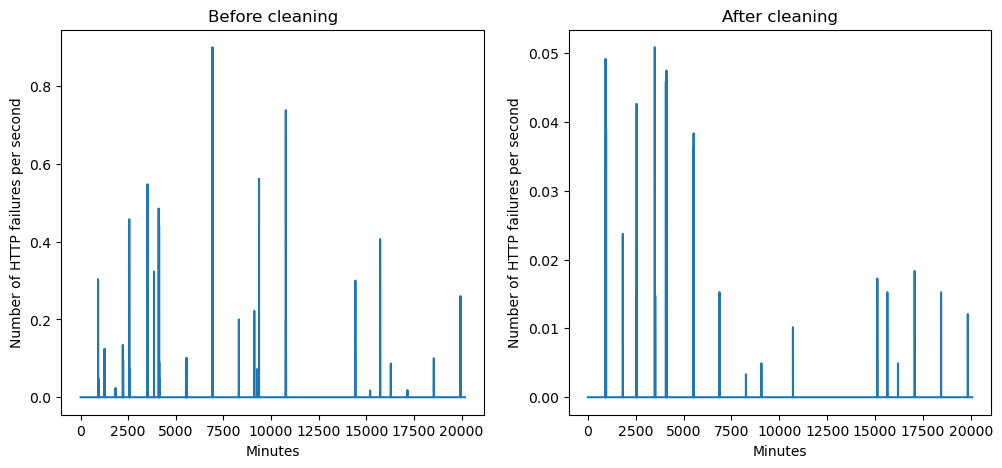

In [71]:
plot_http_failure_rate_before_and_after_cleaning(df_original_stats, df_cleaned_stats)